In [2]:
!nvidia-smi

Wed Apr  3 18:24:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.07             Driver Version: 535.161.07   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1080 Ti     Off | 00000000:01:00.0  On |                  N/A |
| 32%   54C    P0              67W / 275W |    734MiB / 11264MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11169MiB)
Setup complete ✅ (8 CPUs, 62.7 GB RAM, 217.7/915.3 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [34]:
!mkdir datasets
%cd datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="CMAK5iHcwcUzZLqrain4")
project = rf.workspace("rudra-vhs8a").project("cell-detection-qsblz")
version = project.version(1)
dataset = version.download("yolov8")
%cd ..

/home/vplab/Desktop/kanth/YOLOv8/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cell-detection-1 in yolov8:: 100%|████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 7400.30it/s]

/home/vplab/Desktop/kanth/YOLOv8


In [22]:
%ls

14880.jpg  datasets/  runs/  Yolov8.ipynb  yolov8n.pt  yolov8s.pt


In [35]:
!yolo task=detect mode=train model=yolov8s.pt data=/home/vplab/Desktop/kanth/YOLOv8/datasets/cell-detection-1/data.yaml epochs=25 imgsz=800 plots=True project=YOLOv8-F name=main exist_ok=True  

100%|██████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 90.3MB/s]
New https://pypi.org/project/ultralytics/8.1.34 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.9 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11169MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/vplab/Desktop/kanth/YOLOv8/datasets/cell-detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLOv8-F, name=main, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=Fa

In [5]:
!yolo task=detect mode=predict model=YOLOv8-F/main/weights/best.pt conf=0.4 source=Performence_Analysis/Main_input save=True imgsz=100 show_labels=False project=temp max_det=1000000 save_txt=True

WARNING ⚠️ YOLOv8-F/main/weights/best.pt appears to require 'dill', which is not in ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 KB 1.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 1.9s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11169MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ imgsz=[100] must be multiple of max stride 32, 

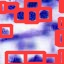

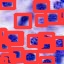

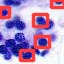

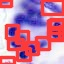

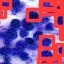

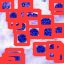

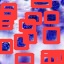

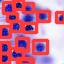

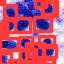

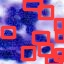

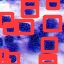

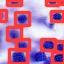

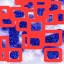

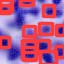

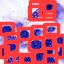

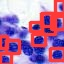

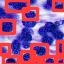

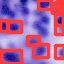

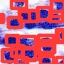

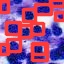

In [4]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('temp/predict13/*.jpg')[:]:
      display(Image(filename=image_path, width=600))
      print("\n")